In [1]:
import pandas as pd
import matplotlib.pyplot as plt
posts = pd.read_csv('../data/blogset-br.csv.gz', compression='gzip', header=None,nrows=10000,usecols=[4])
posts.columns = ["content"]

In [85]:
posts.head()

,content
0,\n
1,SÃAAAO MUITOO LINDOS AMEEI OOO MIRAGEM AZUL *-*
2,A Nova coleção da Risqué veeeeio ANIMAL hehe c...
3,esmaltes
4,A MOHDA nesse inverno enta trazendo para nos v...


In [86]:
import re
"""
Count the number of sentences in a paragraph.

Explanation of the regular expression used:
- (?<!\w\.\w.): Negative lookbehind assertion to ensure not matching periods within abbreviations.
- (?<![A-Z][a-z]\.): Negative lookbehind assertion to avoid matching periods in titles or abbreviations.
- (?<=\.|\?): Positive lookbehind assertion for matching periods or question marks marking the end of a sentence.
- \s: Matches any whitespace character after a period or question mark.
"""
# Regular expression pattern for splitting sentences
sentence_pattern = r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s'

def count_sentences(paragraph):
    # Split the paragraph into sentences using regex
    sentences = re.split(sentence_pattern, paragraph)
    # Return the count of sentences
    return len(sentences)

In [87]:
posts["content"] = posts["content"].replace("\n","")

(array([9.906e+03, 6.900e+01, 1.500e+01, 4.000e+00, 0.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([  1. ,  89.9, 178.8, 267.7, 356.6, 445.5, 534.4, 623.3, 712.2,
        801.1, 890. ]),
 <BarContainer object of 10 artists>)

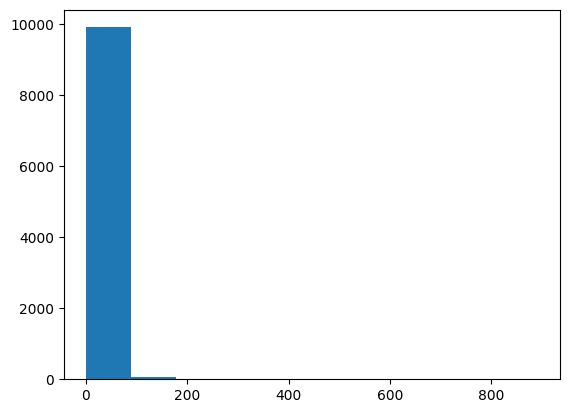

In [88]:
posts["size"] = posts["content"].apply(count_sentences)
plt.hist(posts["size"])

In [89]:
posts = posts[posts["size"] > 30]

(array([719.,  34.,  11.,   4.,   0.,   2.,   2.,   0.,   0.,   2.]),
 array([ 31. , 116.9, 202.8, 288.7, 374.6, 460.5, 546.4, 632.3, 718.2,
        804.1, 890. ]),
 <BarContainer object of 10 artists>)

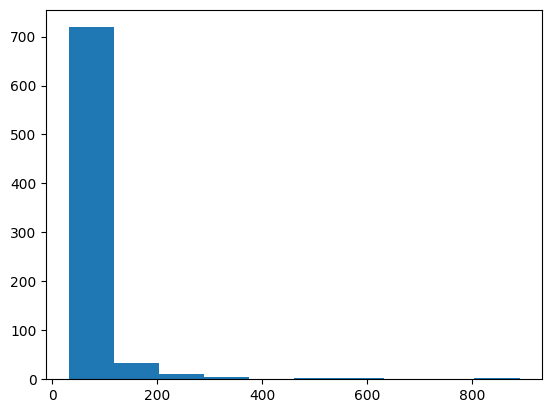

In [90]:
plt.hist(posts["size"])

In [91]:
posts.iloc[posts["size"].argmax()]["content"]

'- Freqüentemente nossos ouvintes perguntam qual a razão de, como cristãos, especialmente como adventistas do sétimo dia, contarmos a duração dos dias de forma diferente. Por que o sábado é contado a partir do pôr do sol de sexta-feira, e não a partir da meia-noite? Por que o ano de 1995 vai começar no pôr do sol do sábado, às 20:29 - segundo a meteorologia e não à meia-noite? E o calendário nunca foi mudado? Poderia o sábado original ser na verdade uma segunda-feira ou estar em outro dia da semana?\n\nNão é difícil de entender. O CONSULTORIA BÍBLICA de hoje vai procurar responder estas e outras questões.\n"O tempo que a Terra gasta em seu movimento de oeste para leste, descrevendo uma elipse alongada em torno do sol, forma o ano. O espaço de tempo necessário para uma evolução completa da lua em volta da Terra forma o mês. O período que a Terra leva para completar o movimento de rotação ao redor de seu próprio eixo, forma o dia. Com efeito, o ano, o mês e o dia estão associados, como u